In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle
import blosc

from pprint import pprint
import re

from openbabel import openbabel as ob

## Reading and Visualising of some bond lengths

In [13]:
bond_lengths={}

with open("cod-crest_bond_lengths.pkl", "rb") as f:
    compressed_pickle = f.read()

#depressed_pickle = blosc.decompress(compressed_pickle)
bond_lengths.update(pickle.loads(compressed_pickle))

In [21]:
len(bond_lengths['C - C , 2'])

65524

In [22]:
max(bond_lengths['C - C , 2'])

1.8531

In [23]:
min(bond_lengths['C - C , 2'])

0.8495

In [32]:
np.mean(bond_lengths['C - C , 1'])

1.5060849712806137

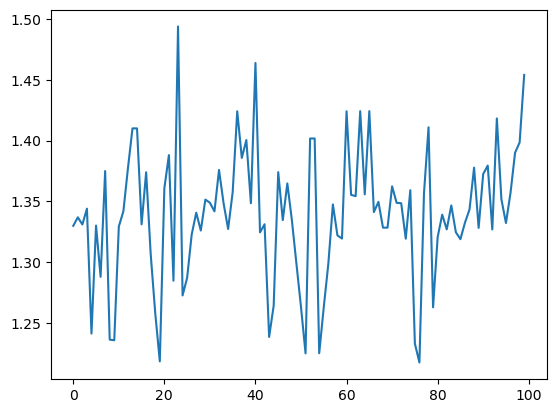

In [50]:
plt.plot(bond_lengths['C - C , 2'][0:100])

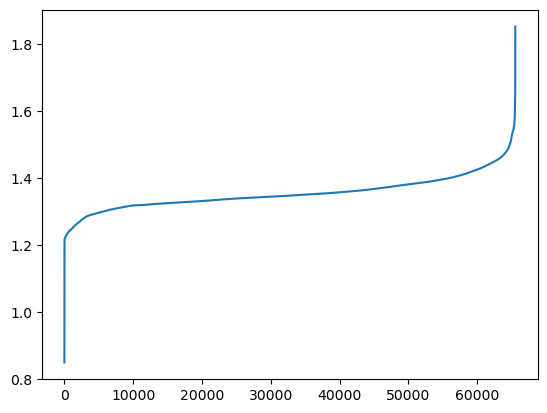

In [39]:
binomial_bond_lengths = np.sort(bond_lengths['C - C , 2'])
plt.plot(binomial_bond_lengths)

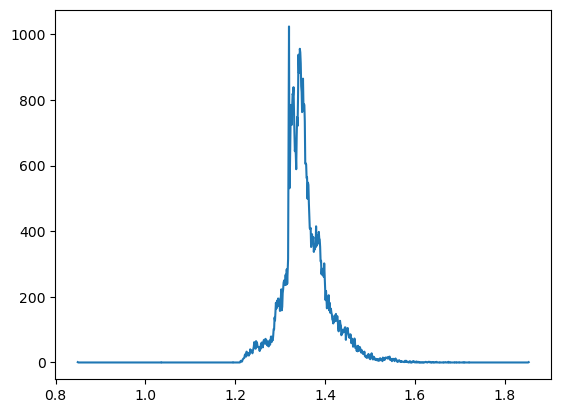

In [49]:
dist = np.histogram(binomial_bond_lengths, 1000, (0.8495, 1.8531))
plt.plot(np.linspace(0.8495, 1.8531, 1000), dist[0])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

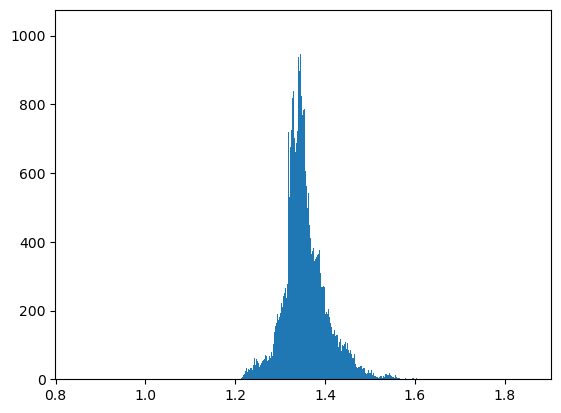

In [42]:
plt.hist(binomial_bond_lengths, 1000, (0.8495, 1.8531))

In [66]:
re.split(',| ', 'C - H , 1')

['C', '-', 'H', '', '', '1']

In [74]:
''' The format of the pandas data frame is going to be:-
no. of entries, firstElement, secondElement, bondOrder, 
meanBondLength, stdBondLength, minBondLength, maxBondLength and index same as key'''

list_bond_length = []

for key in bond_lengths.keys():
    bond = re.split(',| ', key)
    bondOrder = bond[-1]
    firstElement = bond[0]
    secondElement = bond[2]
    
    length = np.array(bond_lengths[key])
    new_row = {'No. of entries':len(length), '1st Element':firstElement, '2nd Element':secondElement, 'Bond Order':bondOrder, 
               'Mean Bond Length':length.mean(), 'Std dev Bond Length': length.std(),
               'Max Bond Length': length.max(), 'Min Bond Length': length.min()}
    
    list_bond_length.append(new_row)
    
df = pd.DataFrame(list_bond_length)

In [75]:
pd.set_option('display.max_rows', df.shape[0]+1)
df

,No. of entries,1st Element,2nd Element,Bond Order,Mean Bond Length,Std dev Bond Length,Max Bond Length,Min Bond Length
0,1088769,C,H,1,1.089760,0.029331,26.8265,0.4744
1,630962,Car,H,1,1.079256,0.005432,3.6977,0.6790
2,7089,C,Nar,1,1.434473,0.025552,1.7933,1.2446
3,532451,Car,Car,1,1.395366,0.020919,1.8992,1.2699
4,503416,Car,Car,2,1.388992,0.013978,1.6768,1.2493
5,54833,Car,Nar,1,1.360459,0.025529,1.5909,1.2627
6,5965,Nar,Nar,1,1.336357,0.019944,1.4501,1.2493
7,4766,Car,O,2,1.212279,0.010974,1.3861,1.1761
8,160657,C,Car,1,1.484499,0.033683,1.8021,1.2886
9,20068,Car,Npl,1,1.379809,0.029083,1.5942,1.2143


## Defining the required parameters

In [76]:
specialElements = ['Car', 'Nar', 'Nam', 'Npl', 'Ntr', 'HO', 'Sac', 'So', 'O.co', 'Cac', 
                   'Nox', 'N+', 'P+', 'O-', 'C+', 'Ng+', 'Sox', 'Pac', 'C-', 'S+']

In [91]:
electronegativity = [
    2.20, 0.00, 0.98, 1.57, 2.04, 2.55, 3.04, 3.44, 3.98, 0.00, 0.93, 1.31, 1.61, 1.90, 2.19,
    2.58, 3.16, 0.00, 0.82, 1.00, 1.36, 1.54, 1.63, 1.66, 1.55, 1.83, 1.91, 1.88, 1.90, 1.65,
    1.81, 2.01, 2.18, 2.55, 2.96, 0.00, 0.82, 0.95, 1.22, 1.33, 1.60, 2.16, 1.90, 2.20, 2.28,
    2.20, 1.93, 1.69, 1.78, 1.96, 2.05, 2.10, 2.66, 0.00, 0.79, 0.89, 1.10, 1.12, 1.13, 1.14,
    1.13, 1.17, 1.20, 1.20, 1.20, 1.22, 1.23, 1.24, 1.25, 1.10, 1.27, 1.30, 1.50, 2.36, 1.90,
    2.20, 2.20, 2.28, 2.54, 2.00, 1.62, 2.33, 2.02, 2.00, 2.20, 0.00, 0.70, 0.90, 1.10, 1.30,
    1.50, 1.38, 1.36, 1.28, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30,
    1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30, 1.30 
]

In [81]:
atomic_numbers = {
    'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5,  'C': 6,  'N': 7,  'O': 8,  'F': 9,  'Ne': 10, 
    'Na': 11, 'Mg': 12,'Al': 13,'Si': 14,'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19, 
    'Ca': 20, 'Sc': 21, 'Ti': 22, 'V': 23, 'Cr': 24, 'Mn': 25, 'Fe': 26, 'Co': 27, 'Ni': 28,
    'Cu': 29, 'Zn': 30, 'Ga': 31, 'Ge': 32, 'As': 33, 'Se': 34, 'Br': 35, 'Kr': 36, 'Rb': 37,
    'Sr': 38, 'Y': 39, 'Zr': 40, 'Nb': 41, 'Mo': 42, 'Tc': 43, 'Ru': 44, 'Rh': 45, 'Pd': 46, 
    'Ag': 47, 'Cd': 48, 'In': 49, 'Sn': 50, 'Sb': 51, 'Te': 52, 'I': 53, 'Xe': 54, 'Cs': 55,
    'Ba': 56, 'La': 57, 'Ce': 58, 'Pr': 59, 'Nd': 60, 'Pm': 61, 'Sm': 62, 'Eu': 63, 'Gd': 64,
    'Tb': 65, 'Dy': 66, 'Ho': 67, 'Er': 68, 'Tm': 69, 'Yb': 70, 'Lu': 71, 'Hf': 72, 'Ta': 73,
    'W': 74,  'Re': 75, 'Os': 76, 'Ir': 77, 'Pt': 78, 'Au': 79, 'Hg': 80, 'Tl': 81, 'Pb': 82,
    'Bi':83, 'Po': 84, 'At': 85, 'Rn': 86, 'Fr': 87, 'Ra': 88, 'Ac': 89, 'Th': 90, 'Pa': 91,
    'U': 92, 'Np': 93,'Pu': 94,'Am': 95,'Cm': 96,'Bk': 97,'Cf': 98,'Es': 99,'Fm': 100, 'Md': 101, 
    'No': 102, 'Lr': 103, 'Rf': 104, 'Db': 105, 'Sg': 106, 'Bh': 107, 'Hs': 108, 'Mt': 109, 
    'Ds': 110, 'Rg': 111, 'Cn': 112, 'Nh': 113, 'Fl': 114, 'Mc': 115, 'Lv': 116, 'Ts': 117, 'Og': 118
}

In [110]:
covalent_radii = [
  # Dummy, 1st row
  0.18, 0.32, 0.46,
  # 2nd row
  1.33, 1.02, 0.85, 0.75, 0.71, 0.63, 0.64, 0.67,
  # 3rd row
  1.55, 1.39, 1.26, 1.16, 1.11, 1.03, 0.99, 0.96,
  # 4th row K, Ca
  1.96, 1.71,
  # 1st row TM (Sc.. Zn)
  1.48, 1.36, 1.34, 1.22, 1.19, 1.16, 1.11, 1.10, 1.12, 1.18,
  # 4th row p-block (Ga..Kr)
  1.24, 1.21, 1.21, 1.16, 1.14, 1.17,
  # 5th row Rb, Sr
  2.10, 1.85,
  # 2nd row TM (Y..Cd)
  1.63, 1.54, 1.47, 1.38, 1.28, 1.25, 1.25, 1.20, 1.28, 1.36,
  # 5th row p-block (In..Xe)
  1.42, 1.40, 1.40, 1.36, 1.33, 1.31,
  # 6th row Cs, Ba
  2.32, 1.96,
  # Lanthanides La..Gd
  1.80, 1.63, 1.76, 1.74, 1.73, 1.72, 1.68,
  # Lanthanides Tb..Yb
  1.69, 1.68, 1.67, 1.66, 1.65, 1.64, 1.70,
  # 3rd row TM (Lu..Hg)
  1.62, 1.52, 1.46, 1.37, 1.31, 1.29, 1.22, 1.23, 1.24, 1.33,
  # 6th row p-block (Tl..Rn)
  1.44, 1.44, 1.51, 1.45, 1.47, 1.42,
  # 7th row Fr, Ra
  2.23, 2.01,
  # Actinides (Ac.. Am)
  1.86, 1.75, 1.69, 1.70, 1.71, 1.72, 1.66,
  # Actinides (Cm..No)
  1.66, 1.68, 1.68, 1.65, 1.67, 1.73, 1.76,
  # Trans-actinides
  1.61, 1.57, 1.49, 1.43, 1.41, 1.34, 1.29, 1.28, 1.21, 1.22, 1.36, 1.43, 1.62,
  1.75, 1.65, 1.57 ]

def estimate_bond_length(Z1 : int, Z2 : int, bond_order: float) -> float:
  """Estimate bond length between two atoms with atomic numbers Z1 and Z2
    and bond order bond_order
    Note that the bond order can be from a Wiberg bond order or Mayer bond order
    in which case, the order will be a float (e.g., 1.24 or 2.34) reflecting
    delocalization, etc.
    Args:
        Z1 (int): Atomic number of first atom
        Z2 (int): Atomic number of second atom
        bond_order (float): Bond order (1.0 for single bond, 2.0 for double bond, etc.)
  """
  single_bond = np.take(covalent_radii, Z1) + np.take(covalent_radii, Z2)
  # this is an empirical fit from internal data from the Hutchison group
  return single_bond * np.power(bond_order, -0.25)

In [78]:
def convertToAtomicNumber(atom: str) -> int:
    if atom in specialElements:
        return atomic_numbers[atom[0]]
    else:
        return atomic_numbers[atom]

In [94]:
df['1st atom'] = df["1st Element"].apply(convertToAtomicNumber)
df['2nd atom'] = df["2nd Element"].apply(convertToAtomicNumber)
#df['1st covalent radius'] = df['1st atom'].apply(lambda x: covalent_radii[x])
#df['2nd covalent radius'] = df['2nd atom'].apply(lambda x: covalent_radii[x])
df

,No. of entries,1st Element,2nd Element,Bond Order,Mean Bond Length,Std dev Bond Length,Max Bond Length,Min Bond Length,1st atom,2nd atom,1st covalent radius
0,1088769,C,H,1,1.089760,0.029331,26.8265,0.4744,6,1,0.75
1,630962,Car,H,1,1.079256,0.005432,3.6977,0.6790,6,1,0.75
2,7089,C,Nar,1,1.434473,0.025552,1.7933,1.2446,6,7,0.75
3,532451,Car,Car,1,1.395366,0.020919,1.8992,1.2699,6,6,0.75
4,503416,Car,Car,2,1.388992,0.013978,1.6768,1.2493,6,6,0.75
5,54833,Car,Nar,1,1.360459,0.025529,1.5909,1.2627,6,7,0.75
6,5965,Nar,Nar,1,1.336357,0.019944,1.4501,1.2493,7,7,0.71
7,4766,Car,O,2,1.212279,0.010974,1.3861,1.1761,6,8,0.75
8,160657,C,Car,1,1.484499,0.033683,1.8021,1.2886,6,6,0.75
9,20068,Car,Npl,1,1.379809,0.029083,1.5942,1.2143,6,7,0.75


In [93]:
#Reordering Pandas DataFrame columns

cols = ['No. of entries', '1st Element', '2nd Element', 'Bond Order', 'Mean Bond Length', 
        'Std dev Bond Length', 'Max Bond Length', 'Min Bond Length', '1st atom', '2nd atom']

['No. of entries', '1st Element', '2nd Element', 'Bond Order', 'Mean Bond Length', 'Std dev Bond Length', 'Max Bond Length', 'Min Bond Length', '1st atom', '2nd atom']


In [114]:
Accuracy = []

result = estimate_bond_length(df['1st atom'].to_numpy(), df['2nd atom'].to_numpy(), df['Bond Order'].to_numpy(dtype=np.float64))
Accuracy = np.sqrt(np.square(result - df['Mean Bond Length'].to_numpy()))

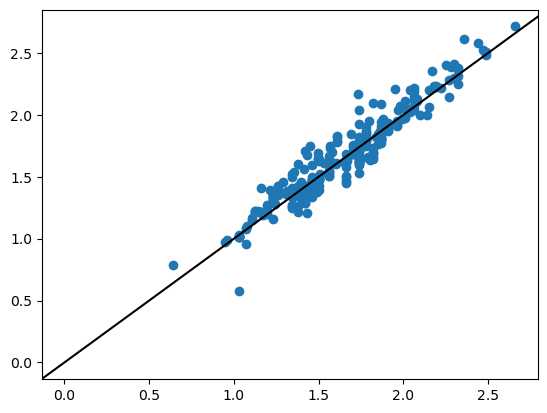

In [122]:
fig, ax = plt.subplots()
ax.axline((0, 0), slope=1, color='black')
ax.scatter(result, df['Mean Bond Length'].to_numpy())

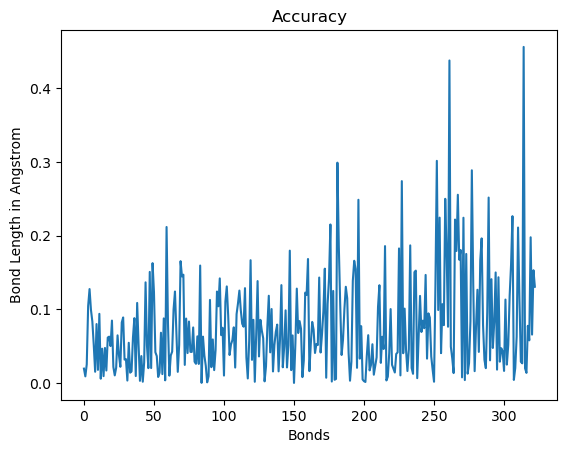

In [125]:
plt.xlabel('Bonds')
plt.ylabel('Bond Length in Angstrom')
plt.title('Accuracy')
plt.plot(Accuracy)

In [124]:
Accuracy.mean()

0.07701822242253488

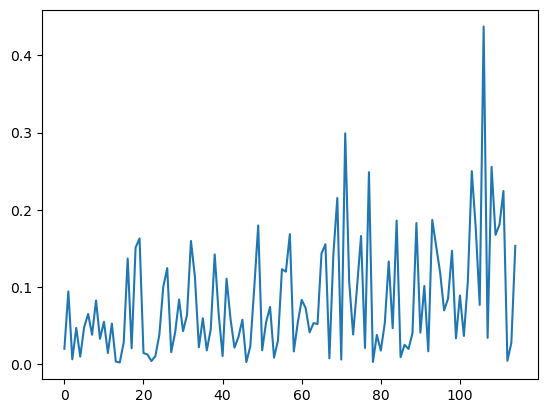

In [132]:
accuracy=[]

for index, row in df.iterrows():
    if(not(row['1st Element'] in specialElements or row['2nd Element'] in specialElements)):
        accuracy.append(Accuracy[index])
    
plt.plot(accuracy)

In [135]:
print(np.std(accuracy))
np.mean(accuracy)

0.07480284072030328


0.08150042885964139

## Training ML Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data into a Pandas DataFrame
data = pd.read_csv('bond_data.csv')  # Replace 'bond_data.csv' with your dataset file name

# Split the data into input features (X) and target variable (y)
X = data[['covalent_radius', 'electronegativity', 'bond_order']]
y = data['bond_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

# Train the models
linear_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
linear_preds = linear_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate the models
linear_mse = mean_squared_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

# Print the evaluation metrics
print("Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)
print()

print("Decision Tree Regression:")
print("Mean Squared Error:", dt_mse)
print("R-squared:", dt_r2)
print()

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)